# Notebook Structure

1. Import necessary dependencies
2. Import the required dataset
3. Visualize different columns using Donut plot
4. How to interpret Donut plot



# 1. Import necessary dependencies

In [94]:
# libraries & dataset
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# 2. Import the required dataset

In [95]:
# Load the titanic dataset
df = sns.load_dataset('titanic')

In [96]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 3. Visualize different columns

### A. Drawing a simple donut plot with default parameters

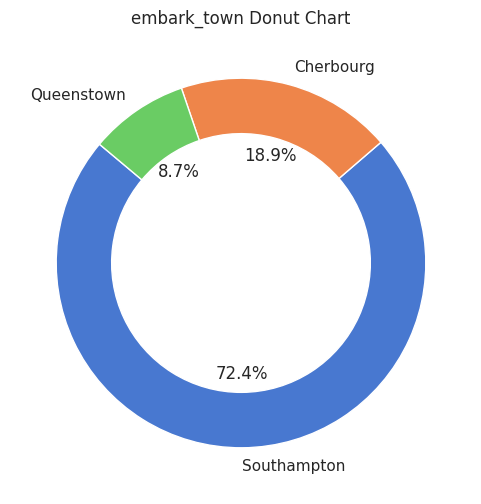

In [98]:
# Get the value counts of the 'embark_town' column
parch_counts = df['embark_town'].value_counts().reset_index()
parch_counts.columns = ['embark_town', 'Count']

# Create a simple donut chart
plt.figure(figsize=(6, 6))  # Adjust figure size as needed

# Create the pie chart with a hole
plt.pie(parch_counts['Count'],
        labels=parch_counts['embark_town'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('muted'),
        wedgeprops=dict(width=0.3))  # Set the width of the hole

# Add a title
plt.title('embark_town Donut Chart')

# Show the plot
plt.show()

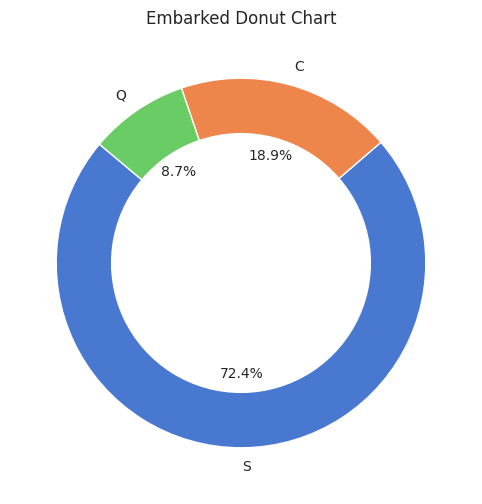

In [87]:

# Get the value counts of the 'Embarked' column
embarked_counts = df['embarked'].value_counts().reset_index()
embarked_counts.columns = ['Embarked', 'Frequency']  # Rename for clarity

# Calculate percentages for the frequency table
embarked_counts['Percentage'] = (embarked_counts['Frequency'] / len(df)) * 100

# Create a donut chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Create the pie chart with a hole
wedges, texts, autotexts = plt.pie(embarked_counts['Frequency'],
                                   labels=embarked_counts['Embarked'],
                                   autopct='%1.1f%%',
                                   startangle=140,
                                   colors=sns.color_palette('muted'),
                                   wedgeprops=dict(width=0.3),  # Set the width of the hole
                                   textprops={'fontsize': 10})

# Add a title
plt.title('Embarked Donut Chart')

# Show the plot
plt.show()

### B. Visualize multiple donut plots

1. Update the columns that you want to visualize
2. Update the colors of the bar
3. Update the num_cols
4. update the figsize



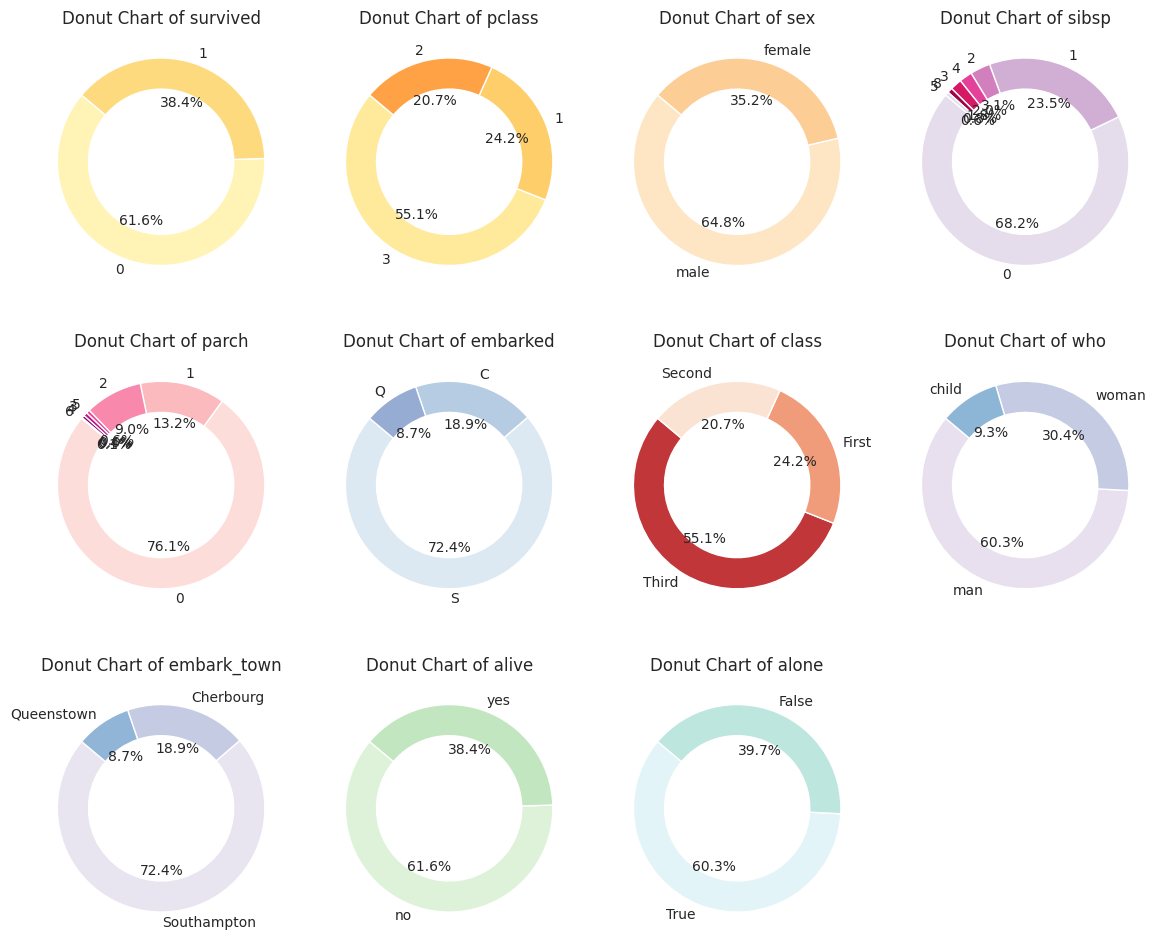

In [93]:
# Define the columns to plot
columns_to_plot = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'embark_town', 'alive', 'alone']

# Define a list of color palettes
color_palettes = ['YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'RdBu', 'PuBuGn', 'PuBu', 'GnBu', 'BuGn']

# Determine the number of rows and columns for the subplot grid
num_cols = 4
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Ensure enough rows

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()

# Iterate through the columns and plot each one in a separate subplot
for i, col in enumerate(columns_to_plot):
    # Select the appropriate subplot axis
    ax = axes[i]

    # Get the value counts for the current column
    counts = df[col].value_counts()

    # Use a different color palette for each donut chart
    palette = color_palettes[i % len(color_palettes)]  # Cycle through palettes

    # Create the donut chart
    ax.pie(counts,
           labels=counts.index,
           autopct='%1.1f%%',  # Keep percentage labels for context
           startangle=140,
           colors=sns.color_palette(palette),
           wedgeprops=dict(width=0.3),  # Create the hole for the donut
           textprops={'fontsize': 10})

    # Set the title for the subplot
    ax.set_title(f"Donut Chart of {col}")

# Remove any unused subplots
if len(columns_to_plot) < num_rows * num_cols:
    for j in range(len(columns_to_plot), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plots
plt.show()

# 4. How to Interpret Donut plot :

Key Features to Look For :

* Slices: The donut chart is divided into slices, each representing a category.
* Slice Size: The size of each slice corresponds to the proportion or percentage of the whole that the category represents. Larger slices indicate larger proportions.
* Categories: Each slice is labeled with the category it represents.
* Percentages/Proportions: Donut charts often include percentages or proportions within each slice to show the relative contribution of each category.
* Colors: Different colors are used to distinguish between categories.
*Hole: Donut charts have a hole in the center, which is a key distinguishing feature from pie charts. The hole doesn't represent any data.


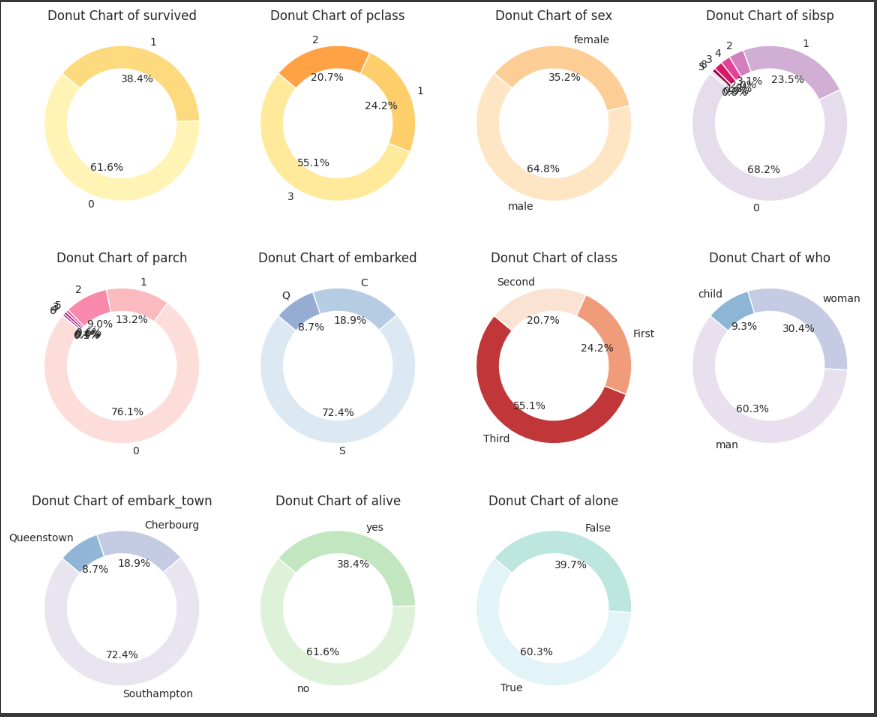


Donut Chart of Survived

* Slices: Two slices representing '0' (did not survive) and '1' (survived).
* Slice Size: The slice for '0' is larger than the slice for '1'.
* Categories: '0' and '1'.
* Percentages/Proportions: 61.6% did not survive, and 38.4% survived.
* Hole: Present in the center.

Donut Chart of Pclass

* Slices: Three slices representing passenger classes '1', '2', and '3'.
* Slice Size: The slice for '3' is the largest, followed by '1', and then '2'.
* Categories: '1', '2', and '3'.
* Percentages/Proportions: 55.1% were in class 3, 24.2% in class 1, and 20.7% in class 2.
* Hole: Present in the center.

Donut Chart of Sex

* Slices: Two slices representing 'male' and 'female'.
* Slice Size: The slice for 'male' is larger than the slice for 'female'.
* Categories: 'male' and 'female'.
* Percentages/Proportions: 64.8% were male, and 35.2% were female.
* Hole: Present in the center.

Donut Chart of Sibsp

* Slices: Six slices representing different numbers of siblings/spouses.
* Slice Size: The slice for '0' is the largest, with decreasing slice sizes as the number of siblings/spouses increases.
* Categories: '0', '1', '2', '3', '4', '5', and '8'.
* Percentages/Proportions: 68.2% had 0 siblings/spouses, 23.5% had 1, and the percentages decrease for larger numbers.
* Hole: Present in the center.

Donut Chart of Parch

* Slices: Seven slices representing different numbers of parents/children.
* Slice Size: The slice for '0' is the largest, with decreasing slice sizes as the number of parents/children increases.
* Categories: '0', '1', '2', '3', '4', '5', and '6'.
* Percentages/Proportions: 76.1% had 0 parents/children, 13.2% had 1, and the percentages decrease for larger numbers.
* Hole: Present in the center.

Donut Chart of Embarked

* Slices: Three slices representing ports of embarkation 'S', 'C', and 'Q'.
* Slice Size: The slice for 'S' is the largest, followed by 'C', and then 'Q'.
* Categories: 'S', 'C', and 'Q'.
* Percentages/Proportions: 72.4% embarked at 'S', 18.9% at 'C', and 8.7% at 'Q'.
* Hole: Present in the center.

Donut Chart of Class

* Slices: Three slices representing passenger classes 'First', 'Second', and 'Third'.
* Slice Size: The slice for 'Third' is the largest, followed by 'First', and then 'Second'.
* Categories: 'First', 'Second', and 'Third'.
* Percentages/Proportions: 55.1% were in 'Third' class, 24.2% in 'First' class, and 20.7% in 'Second' class.
* Hole: Present in the center.

Donut Chart of Who

* Slices: Three slices representing 'man', 'woman', and 'child'.
* Slice Size: The slice for 'man' is the largest, followed by 'woman', and then 'child'.
* Categories: 'man', 'woman', and 'child'.
* Percentages/Proportions: 60.3% were men, 30.4% were women, and 9.3% were children.
* Hole: Present in the center.

Donut Chart of Embark_town

* Slices: Three slices representing embarkation towns 'Southampton', 'Cherbourg', and 'Queenstown'.
* Slice Size: The slice for 'Southampton' is the largest, followed by 'Cherbourg', and then 'Queenstown'.
* Categories: 'Southampton', 'Cherbourg', and 'Queenstown'.
* Percentages/Proportions: 72.4% embarked at 'Southampton', 18.9% at 'Cherbourg', and 8.7% at 'Queenstown'.
* Hole: Present in the center.

Donut Chart of Alive

* Slices: Two slices representing 'no' and 'yes'.
* Slice Size: The slice for 'no' is larger than the slice for 'yes'.
* Categories: 'no' and 'yes'.
* Percentages/Proportions: 61.6% did not survive, and 38.4% survived.
* Hole: Present in the center.

Donut Chart of Alone

* Slices: Two slices representing 'False' and 'True'.
* Slice Size: The slice for 'True' is larger than the slice for 'False'.
* Categories: 'False' and 'True'.
* Percentages/Proportions: 60.3% were traveling alone, and 39.7% were not.
* Hole: Present in the center.